In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
def bpsk_modulation(bits):
    return 2 * bits - 1

In [ ]:
def qpsk_modulation(bits):
    bits = bits.reshape(-1, 2)  # Group bits into pairs
    qpsk_symbols = (2 * bits[:, 0] - 1) + 1j * (2 * bits[:, 1] - 1)
    return qpsk_symbols / np.sqrt(2)


In [ ]:
def psk8_modulation(bits):
    # Map 3 bits to one of the eight phases
    phase_mapping = np.array([0, 1, 2, 3, 4, 5, 6, 7]) * 2 * np.pi / 8
    bits = bits.reshape(-1, 3)
    psk8_symbols = np.exp(1j * phase_mapping[bits.dot([4, 2, 1])])
    return psk8_symbols / np.sqrt(2)

In [ ]:
def bpsk_demodulation(received_signal):
    return (received_signal + 1) / 2

In [ ]:
def qpsk_demodulation(received_signal):
    return np.vstack([np.real(received_signal), np.imag(received_signal)]).flatten() > 0

In [ ]:
def psk8_demodulation(received_signal):
    # Find the phase of the received signal
    received_phase = np.angle(received_signal)
    # Map the phase to the closest symbol
    symbols = np.arange(8) * 2 * np.pi / 8
    demodulated_symbols = np.argmin(np.abs(received_phase - symbols))
    # Convert the symbol to 3-bit representation
    return np.array(list(np.binary_repr(demodulated_symbols, width=3)), dtype=int)


In [ ]:
# Function to add AWGN to the signal
def add_awgn(signal, snr_dB):
    signal_power = np.mean(np.abs(signal) ** 2)
    noise_power = signal_power / (10 ** (snr_dB / 10))
    noise = np.sqrt(noise_power) * (np.random.randn(*signal.shape) + 1j * np.random.randn(*signal.shape))
    return signal + noise

In [ ]:
bit_rate = 1/2


In [ ]:
user_bits_input = input(f"Enter binary bits: ")
bits = np.array([int(bit) for bit in user_bits_input])

# Modulation types: 'bpsk', 'qpsk', 'psk8'
modulation_type = input("modulation type (bpsk, qpsk, psk8): ").lower()

Enter binary bits: 1011001101
modulation type (bpsk, qpsk, psk8): qpsk


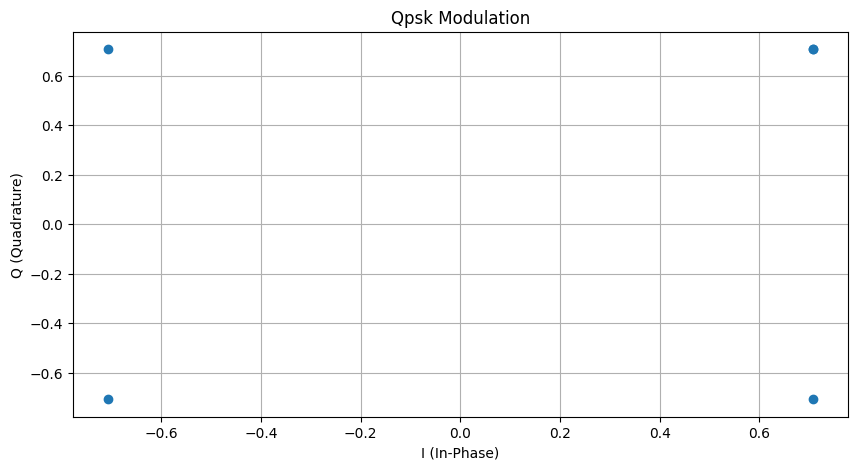

In [ ]:
if modulation_type == 'bpsk':
    modulated_signal = bpsk_modulation(bits)
elif modulation_type == 'qpsk':
    modulated_signal = qpsk_modulation(bits)
elif modulation_type == 'psk8':
    modulated_signal = psk8_modulation(bits)
else:
    raise ValueError("Invalid modulation type")

# Plot the modulated signal
plt.figure(figsize=(10, 5))
plt.scatter(np.real(modulated_signal), np.imag(modulated_signal), marker='o')
plt.title(f'{modulation_type.capitalize()} Modulation')
plt.xlabel('I (In-Phase)')
plt.ylabel('Q (Quadrature)')
plt.grid(True)
plt.show()


SNR value in dB: 8


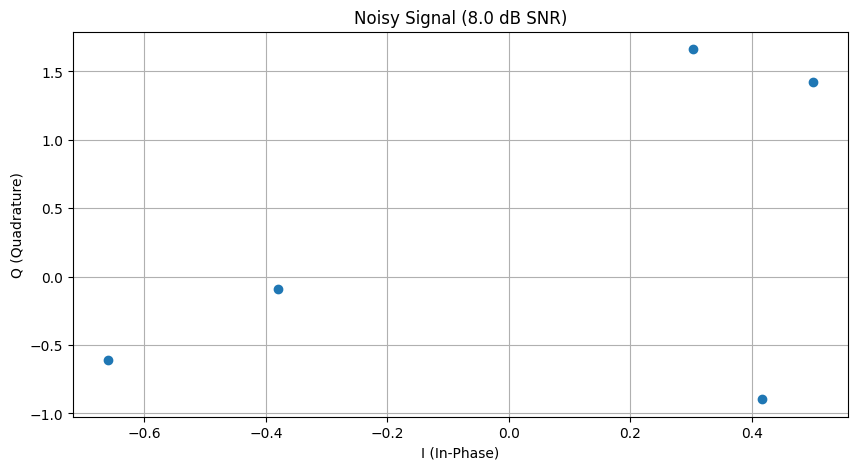

In [ ]:
fixed_snr_dB = float(input("SNR value in dB: "))

# Add AWGN to the signal
noisy_signal = add_awgn(modulated_signal, fixed_snr_dB)

# Plot the noisy signal
plt.figure(figsize=(10, 5))
plt.scatter(np.real(noisy_signal), np.imag(noisy_signal), marker='o')
plt.title(f'Noisy Signal ({fixed_snr_dB} dB SNR)')
plt.xlabel('I (In-Phase)')
plt.ylabel('Q (Quadrature)')
plt.grid(True)
plt.show()

In [ ]:
if modulation_type == 'bpsk':
  demodulated_bits = bpsk_demodulation(noisy_signal)
elif modulation_type == 'qpsk':
  demodulated_bits = qpsk_demodulation(noisy_signal)
elif modulation_type == 'psk8':
  demodulated_bits = psk8_demodulation(noisy_signal)
demodulated_bits = demodulated_bits.astype(int)

In [ ]:

print(f"Demodulated Bits: {demodulated_bits}")


Demodulated Bits: [1 1 0 1 0 0 1 0 1 0]


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
import os
import zipfile

zip_file_path = "/content/drive/MyDrive/dataset_cnn_train_HT_new-20210129T082814Z-001.zip"
extracted_folder = "/content/extracted_dataset"

# Create a folder to extract the contents
os.makedirs(extracted_folder, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List the contents of the extracted folder
number_of_images = {}
for dir in os.listdir(extracted_folder):
    dir_path = os.path.join(extracted_folder, dir)
    if os.path.isdir(dir_path):
        number_of_images[dir] = len(os.listdir(dir_path))

number_of_images.items()

dict_items([('dataset_cnn_train_HT_new', 8)])

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_folder = "/content/extracted_dataset"
train_folder = "/content/train_data"
test_folder = "/content/test_data"
val_folder = "/content/val_data"

# Create train, test, and val folders
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

# Iterate through each class (subdirectory)
for class_name in os.listdir(data_folder):
    class_path = os.path.join(data_folder, class_name)

    # Split the data into train, test, and val sets
    train_data, test_data = train_test_split(os.listdir(class_path), test_size=0.2, random_state=42)
    test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)

    # Create subdirectories in train, test, and val folders
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    val_class_folder = os.path.join(val_folder, class_name)

    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)
    os.makedirs(val_class_folder, exist_ok=True)

    # Move images to the corresponding folders
    for file_name in train_data:
        src_path = os.path.join(class_path, file_name)
        dest_path = os.path.join(train_class_folder, file_name)
        shutil.move(src_path, dest_path)

    for file_name in test_data:
        src_path = os.path.join(class_path, file_name)
        dest_path = os.path.join(test_class_folder, file_name)
        shutil.move(src_path, dest_path)

    for file_name in val_data:
        src_path = os.path.join(class_path, file_name)
        dest_path = os.path.join(val_class_folder, file_name)
        shutil.move(src_path, dest_path)

print("Data split into train, test, and val sets.")


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape = (224,224,3) ))

model.add(Conv2D(filters= 36, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation = 'relu'))
model.add(Dropout(rate=0.25 ))
model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy','AUC'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/train_data"
train_data = preprocessingImages1(path)

Found 36726 images belonging to 1 classes.


In [ ]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/test_data"
test_data = preprocessingImages2(path)

Found 6120 images belonging to 1 classes.


In [ ]:
path = "/content/val_data"
val_data = preprocessingImages2(path)

Found 6122 images belonging to 1 classes.


In [ ]:
import scipy
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 3, verbose= 1, mode = 'auto')

#Model Check Point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

#cd = [es,mc]
cd = [es,mc]


In [ ]:
history = model.fit(
     train_data,
    epochs= 10,
    validation_data = val_data
     )

Epoch 1/10
1148/1148 [==============================] - 7379s 6s/step - loss: 5.5971e-04 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 2/10
1148/1148 [==============================] - 7319s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 3/10
 185/1148 [===>..........................] - ETA: 1:36:45 - loss: 0.0000e+00 - accuracy: 1.0000 - auc: 0.0000e+00

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100} %")
The accuracy of our model is 94.70899701118469 %

In [ ]:
# BER calculation
ber = np.sum(bits != demodulated_bits) / len(bits)
print(f"\nBit Error Rate (BER): {ber:.4f}")

# Variance of the demodulated signal
demodulated_variance = np.var(np.abs(noisy_signal - modulated_signal))
print(f"Variance of Demodulated Signal: {demodulated_variance:.4f}")

# SNR estimation
snr_estimate = 10 * np.log10(np.mean(np.abs(modulated_signal) ** 2) / np.mean(np.abs(noisy_signal - modulated_signal) ** 2))
print(f"SNR Estimate: {snr_estimate:.2f} dB")

# Prediction based on BER, Variance, and SNR
if ber < 0.01 and demodulated_variance < 0.1:
    fec_scheme = 'Reed-Solomon'
elif ber < 0.02 and snr_estimate > 10:
    fec_scheme = 'TPC'
elif demodulated_variance < 0.05:
    fec_scheme = 'Convolutional Code'
elif ber < 0.03:
    fec_scheme = 'BCH'
else:
    fec_scheme = 'LDPC'

print(f"FEC Scheme Prediction: {fec_scheme}")



Bit Error Rate (BER): 0.5000
Variance of Demodulated Signal: 0.1174
SNR Estimate: 3.00 dB
FEC Scheme Prediction: LDPC
